### This notebook presents different ways to present and interpret stock data

In [1]:
# Import generic system packages for data manipulation 
import os
import pandas as pd
import numpy as np
import datetime as dt
import numpy as np

# Import packages for plots
import matplotlib.pyplot as plt 
import panel as pn
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv

# Import packages for data visualisation
import mplfinance as mpf
from dotenv import load_dotenv
import cufflinks as cf
from IPython.display import display
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import holoviews as hv
import seaborn as sns

# Activate set up
load_dotenv()     
%matplotlib inline 
cf.set_config_file(theme='solar',sharing='public',offline=True) #List of Cufflinks Themes :  ['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']


### Get stock data

In [2]:
#Read in alpaca keys and set up API call
alpaca_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_API_SECRET_KEY')
api = tradeapi.REST(alpaca_key, 
                    alpaca_secret_key,
                    api_version='V2')

#Define variables
tickers = ['GOOG', 'FB', 'AMZN', 'AAPL', 'TSLA']

tf = '1D'

start_date = pd.Timestamp('2018-1-1', tz='America/New_York').isoformat()

end_date = pd.Timestamp('2021-1-1', tz='America/New_York').isoformat()

wt = [0.25, 0.25, 0.25, 0.25]

num_sim = 100

num_trade_days=252*2

#Define parameters to get stock data from Alpaca api
tickers_df = api.get_barset(tickers, timeframe=tf, start=start_date, end=end_date, limit=1000).df

#Define paramters to run Monte-Carlo Simulation
close_prices = tickers_df.loc(axis=1)[:,'close']

daily_returns = close_prices.pct_change().dropna()
#print(f"daily ret shape: {daily_returns.shape}")

correlation = daily_returns.corr()

portfolio_cum_return = (1+daily_returns).cumprod()  
#print(f"Cum ret shape: {portfolio_cum_return.shape}")

roll_std = daily_returns.rolling(window=5).std()
#print(f"Roll std shape: {roll_std.shape}")

sharpe_ratio = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
#print(f"Sharpe ratio shape: {sharpe_ratio.shape}")


### Present OHLC data using candlesticks

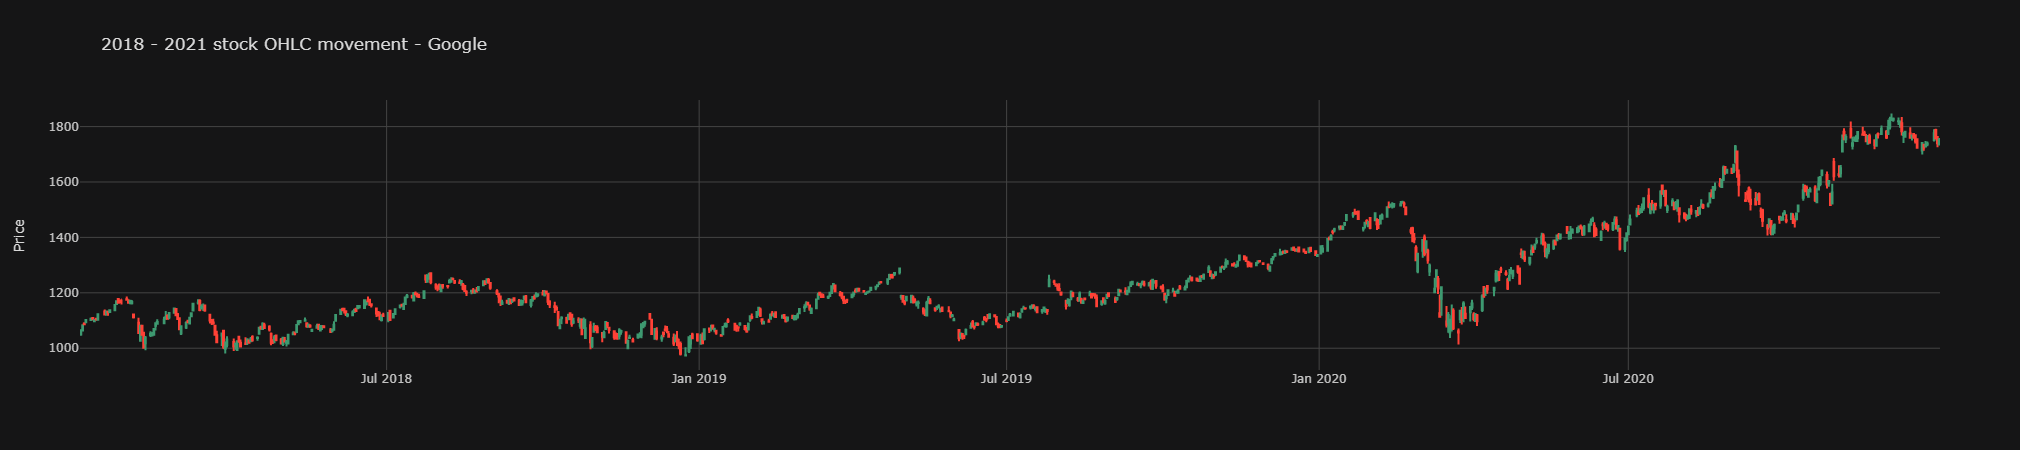

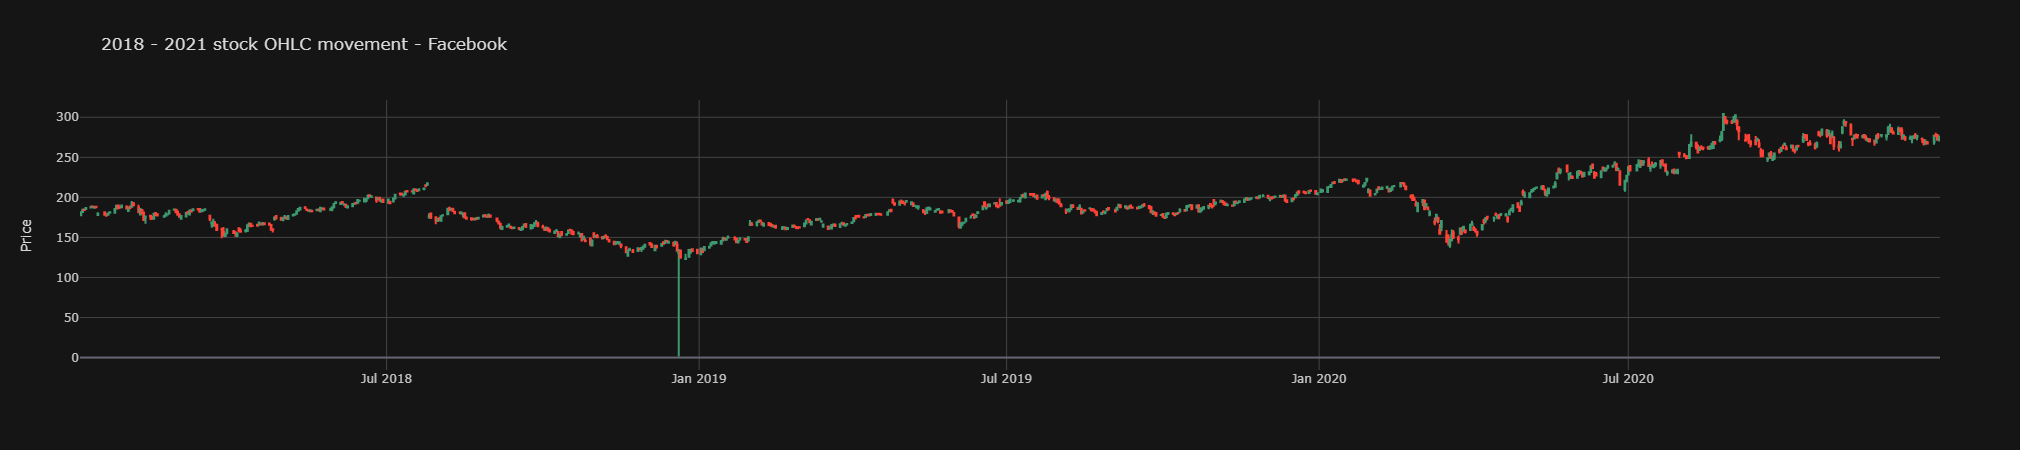

In [3]:
# Let's use Googole's and Facebook's OHLC 
ohlc1 = tickers_df["GOOG"]

ohlc_plot1 = ohlc1.iplot(kind='candle',
                         title='2018 - 2021 stock OHLC movement - Google',
                         yTitle='Price',
                         keys=True)


ohlc2 = tickers_df["FB"]
ohlc_plot2 = ohlc2.iplot(kind='candle',
                         title='2018 - 2021 stock OHLC movement - Facebook',
                         yTitle='Price',
                         keys=True)

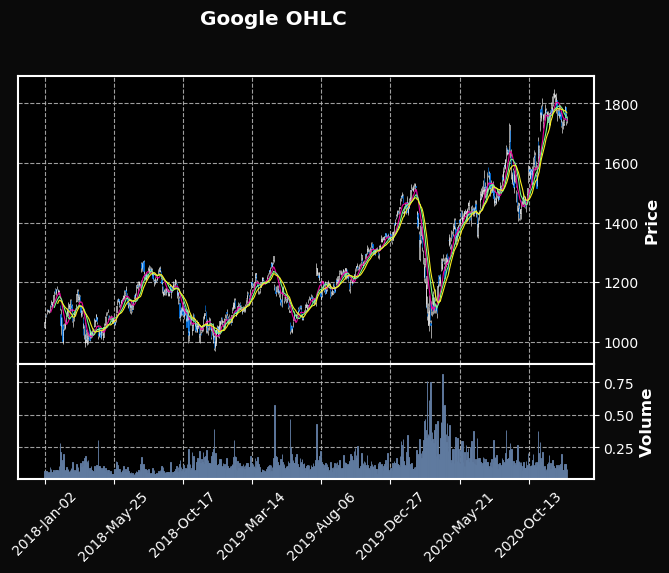

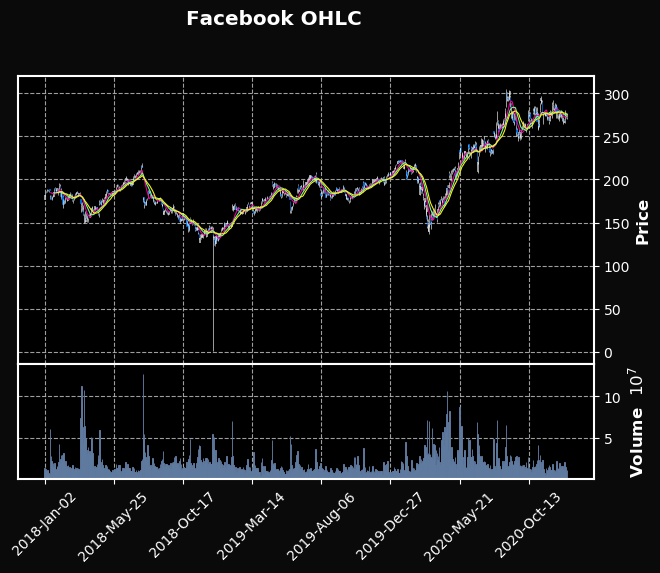

In [4]:
mpf_plot = mpf.plot(ohlc1,
                    type='candle',
                    mav=(10, 15, 20),
                    volume=True,
                    style='mike',
                    title="Google OHLC",
                    warn_too_much_data=5000)

mpf_plot = mpf.plot(ohlc2,
                    type='candle',
                    mav=(10, 15, 20),
                    volume=True,
                    style='mike',
                    title= "Facebook OHLC",
                    warn_too_much_data=5000)

### Plot rolling standard deviations as line plots

In [5]:
# Format dataframe
roll_std.columns = roll_std.columns.droplevel(1)
roll_std.dropna(inplace=True)
roll_std.head()

AAPL      AMZN        FB      GOOG      TSLA
time                                                                       
2018-01-09 00:00:00-05:00  0.005774  0.005048  0.008331  0.006931  0.030947
2018-01-10 00:00:00-05:00  0.005777  0.006543  0.006677  0.006827  0.029457
2018-01-11 00:00:00-05:00  0.005901  0.007484  0.006605  0.006827  0.027664
2018-01-12 00:00:00-05:00  0.005423  0.008932  0.020856  0.007255  0.028953
2018-01-16 00:00:00-05:00  0.005698  0.010228  0.019116  0.007539  0.008629

In [6]:
#Use hv.plot()
roll_std.hvplot(title="5-day rolling standard deviation",
                width=1200,
                height=500)

:NdOverlay   [Variable]
   :Curve   [time]   (value)

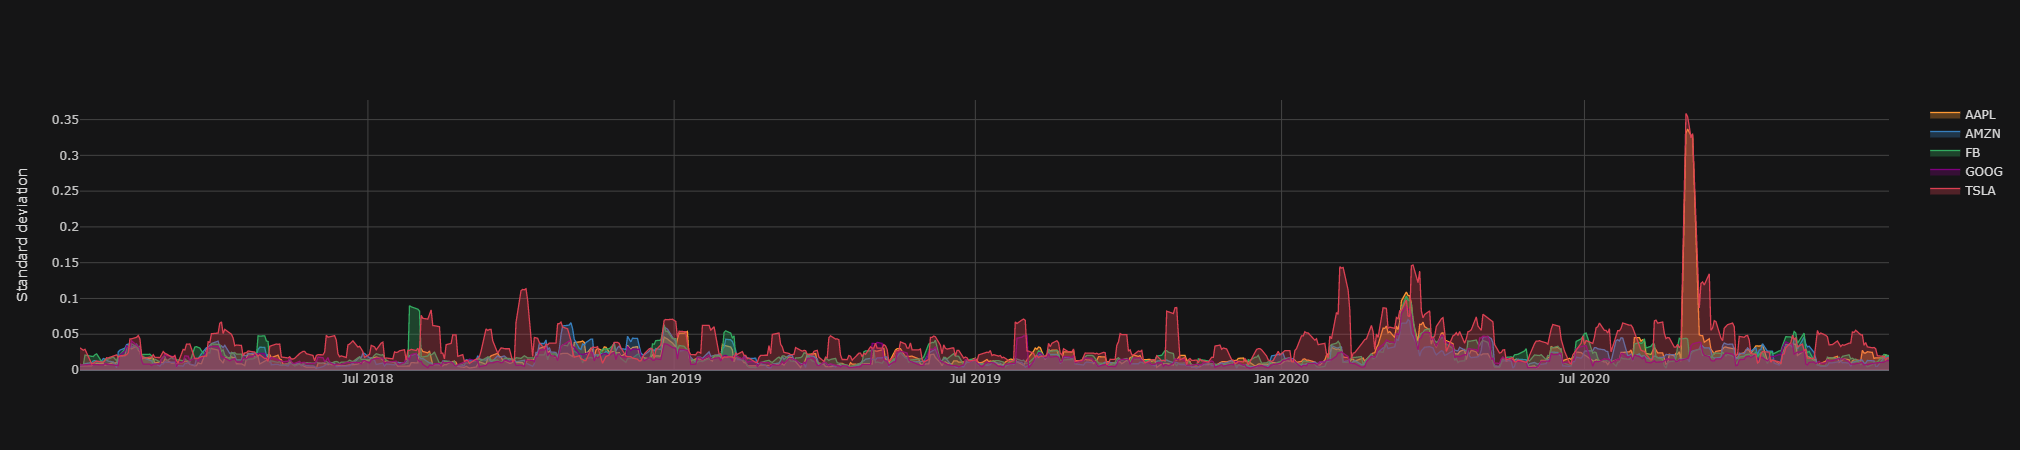

In [7]:
#Use cufflinks' iplot
roll_std.iplot(kind='line',
               fill=True,
               yTitle='Standard deviation')

### Plot rolling standard deviations as line plots

In [8]:
portfolio_cum_return.columns = portfolio_cum_return.columns.droplevel(1)
portfolio_cum_return.dropna(inplace=True)
portfolio_cum_return.head()

AAPL      AMZN        FB      GOOG      TSLA
time                                                                       
2018-01-03 00:00:00-05:00  0.999536  1.011556  1.016811  1.016058  0.989759
2018-01-04 00:00:00-05:00  1.004412  1.017359  1.015929  1.020190  0.982297
2018-01-05 00:00:00-05:00  1.015674  1.033701  1.029488  1.034707  0.988323
2018-01-08 00:00:00-05:00  1.012075  1.048738  1.037590  1.038980  1.050329
2018-01-09 00:00:00-05:00  1.012017  1.053928  1.035661  1.039365  1.041837

In [9]:
# Using hvplot
AAPL_hvplot = portfolio_cum_return[["AAPL"]].hvplot(x='Time (years)',
                                                    color='red',
                                                    label="AAPL")



AMZN_hvplot = portfolio_cum_return[["AMZN"]].hvplot(x='Time (years)',
                                                    color='blue',
                                                    label="AMZN")


FB_hvplot = portfolio_cum_return[["FB"]].hvplot(x='Time (years)',
                                                color='black',
                                                label="FB")


GOOG_hvplot = portfolio_cum_return[["GOOG"]].hvplot(x='Time (years)',
                                                    color='green',
                                                    label="GOOG")
                                                  

TSLA_hvplot = portfolio_cum_return[["TSLA"]].hvplot(x='Time (years)',
                                                    color='yellow',
                                                    label="TSLA")

comb = (AAPL_hvplot * AMZN_hvplot * FB_hvplot * GOOG_hvplot * TSLA_hvplot).opts(legend_position='right',
                                                                                width=1200,
                                                                                height=400)
comb

:Overlay
   .Curve.AAPL :Curve   [Time (years)]   (AAPL)
   .Curve.AMZN :Curve   [Time (years)]   (AMZN)
   .Curve.FB   :Curve   [Time (years)]   (FB)
   .Curve.GOOG :Curve   [Time (years)]   (GOOG)
   .Curve.TSLA :Curve   [Time (years)]   (TSLA)

In [10]:
daily_returns.columns = daily_returns.columns.droplevel(1)
daily_returns.dropna(inplace=True)
daily_returns.head()

AAPL      AMZN        FB      GOOG      TSLA
time                                                                       
2018-01-03 00:00:00-05:00 -0.000464  0.011556  0.016811  0.016058 -0.010241
2018-01-04 00:00:00-05:00  0.004879  0.005737 -0.000867  0.004067 -0.007539
2018-01-05 00:00:00-05:00  0.011213  0.016063  0.013346  0.014230  0.006134
2018-01-08 00:00:00-05:00 -0.003544  0.014548  0.007870  0.004129  0.062739
2018-01-09 00:00:00-05:00 -0.000057  0.004948 -0.001859  0.000371 -0.008085

Text(0, 0.5, 'Cumulative returns')

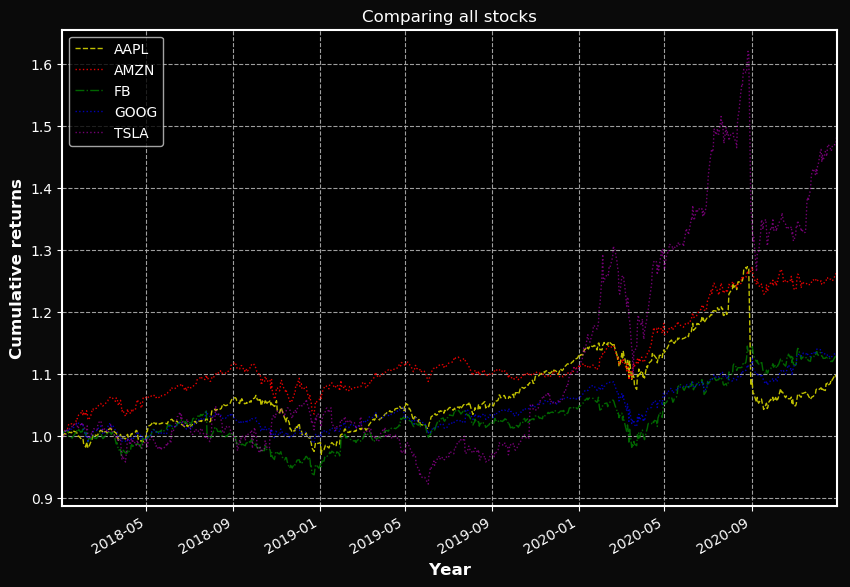

In [11]:
# Plot cumulative returns
# Calculate weighted returns (equal weighting)
aapl_returns = daily_returns['AAPL'] * 0.2
amzn_returns = daily_returns['AMZN'] * 0.2
fb_returns = daily_returns['FB'] * 0.2
goog_returns = daily_returns['GOOG'] * 0.2
tsla_returns = daily_returns['TSLA'] * 0.2

# Calculate cumulative returns of all portfolios
cumlative_returns_aapl = (1+aapl_returns).cumprod()
cumlative_returns_amzn = (1+amzn_returns).cumprod()
cumlative_returns_fb = (1+fb_returns).cumprod()
cumlative_returns_goog = (1+goog_returns).cumprod()
cumlative_returns_tsla = (1+tsla_returns).cumprod()

# Plot cumulative returns
plot1 = cumlative_returns_aapl.plot(figsize=(10, 7), color='y', linestyle='dashed', title='Comparing all stocks')
cumlative_returns_amzn.plot(ax=plot1, color='r', linestyle='dotted', alpha=0.9)
cumlative_returns_fb.plot(ax=plot1, color='g', linestyle='dashdot', alpha=0.8)
cumlative_returns_goog.plot(ax=plot1, color='b', linestyle='dotted', alpha=0.7)
cumlative_returns_tsla.plot(ax=plot1, color='m', linestyle='dotted', alpha=0.6)

plot1.legend(['AAPL', 'AMZN', 'FB', 'GOOG', 'TSLA'])
plot1.set_xlabel('Year')
plot1.set_ylabel('Cumulative returns')

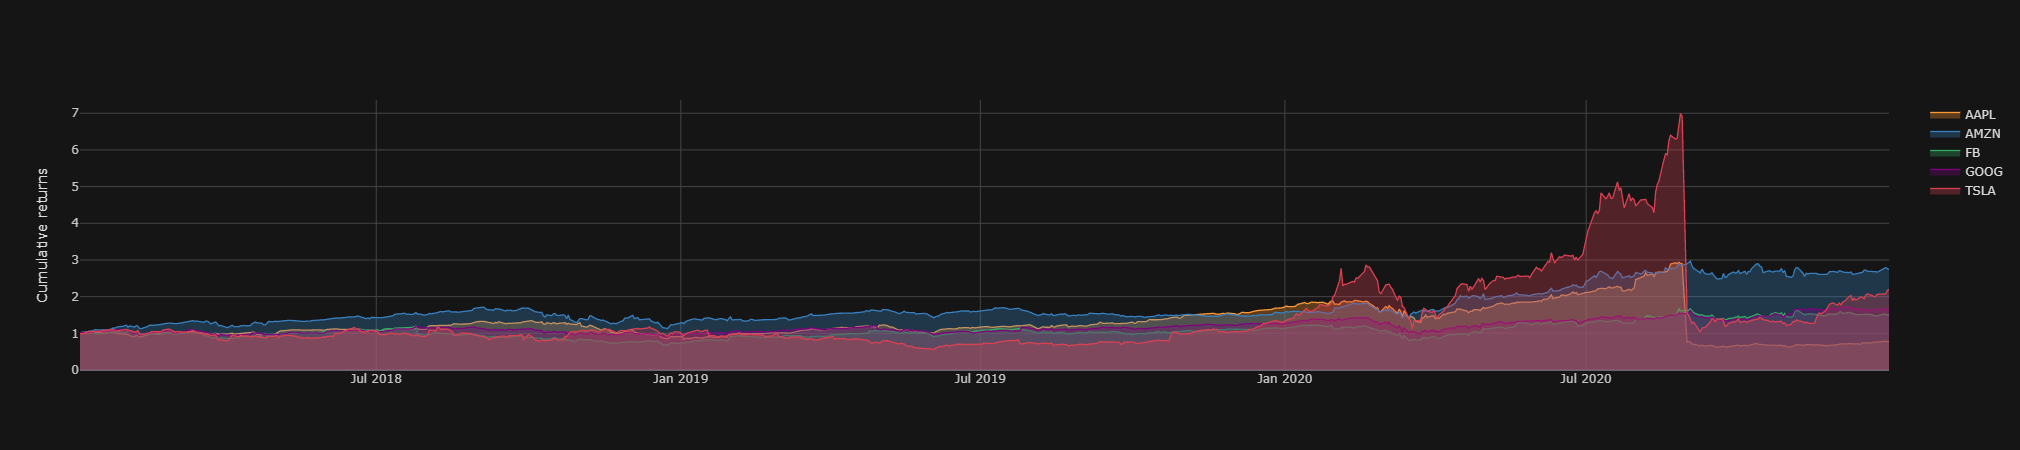

In [12]:
#Using cuff links
portfolio_cum_return.iplot(kind='line',
                           fill=True,
                           yTitle="Cumulative returns")

### Plotting correlations

In [13]:
correlation.index = correlation.index.droplevel(1)
correlation.columns = correlation.columns.droplevel(1)
correlation

AAPL      AMZN        FB      GOOG      TSLA
AAPL  1.000000  0.398328  0.397933  0.453482  0.643554
AMZN  0.398328  1.000000  0.631579  0.680323  0.314925
FB    0.397933  0.631579  1.000000  0.703349  0.283112
GOOG  0.453482  0.680323  0.703349  1.000000  0.327430
TSLA  0.643554  0.314925  0.283112  0.327430  1.000000

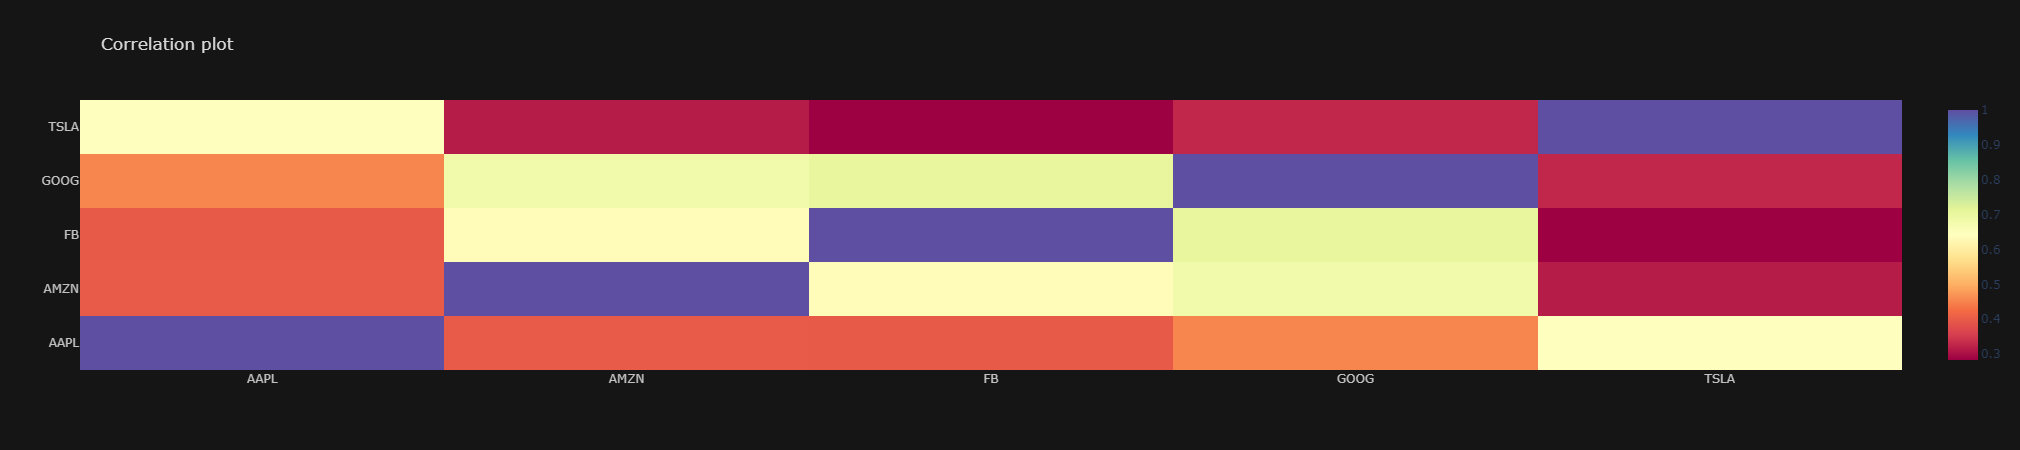

In [14]:
#Using iplot() (https://stackoverflow.com/questions/42310243/cufflinks-how-to-set-upper-and-lower-value-for-the-colorscale)
correlation.iplot(kind='heatmap',
                  mode='markers',
                  title="Correlation plot",
                  colorscale='spectral')

In [15]:
# Usign hvplot
heatmap_plot = correlation.hvplot.heatmap(ymarks_hover_color='cyan',
                                          hover_color='cyan',
                                          alpha=0.9,
                                          colorbar=True,
                                          cmap='bjy')

heatmap_plot

:HeatMap   [columns,index]   (value)

Text(0.5, 1.0, 'Correlation')

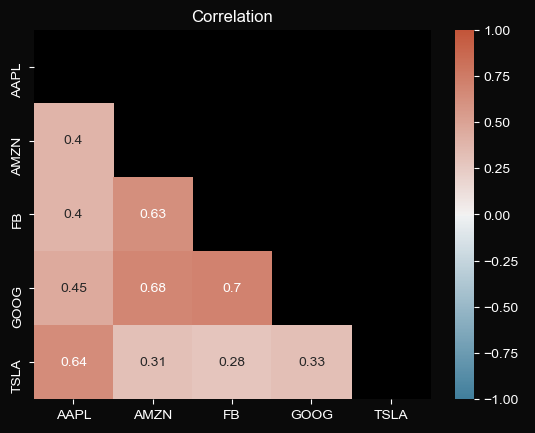

In [16]:
# Using Seaborn
matrix = np.triu(correlation)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
h = plt.axes()

plot = sns.heatmap(correlation, 
                   vmin=-1, 
                   vmax=1, 
                   annot=True,
                   cmap=cmap, 
                   mask=matrix)


sns.set(rc={'figure.figsize':(10,7)})
h.set_title('Correlation')